# Assignment 4 - Nonlinear programming (NLP)

This assignment is structured in two blocks: individual tasks and group tasks. The individual tasks are made of simple preliminary exercises that should be done individually before the instruction session. These are necessary/helpful for completing the group tasks. The group tasks involve the use of Python/Pyomo and consist of a complete optimization problem, which will be solved during the instructions.

## Individual Tasks

## Exercise 1

**(a)** Formulate Economic Dispatch with Elastic Demand as an optimization problem and 

**(b)** Explain how it can be solved 

**(c)** What can you say about the incremental utility? What does the incremental utilitysay? 


<div style="color:red">

**(a)**  If the demands are elastic, the ED consists of maximizing the social welfare:

$\max SW{(P_{G}, P_{D})} = \sum_{j=1}^m U_j(P_{D_j}) - \sum_{i=1}^n C_i(P_{G_i})$  (**objective function**)

with $P_{Dj}$ and $P_{Gi}$ , as _decision variables_, whereby an elastic demand is characterized
by its utility function, $U_{j}(P_{Dj})$ in [€/h], expressing the individual utility or benefit obtained
by consuming the individual demand PDj MW during 1 h.

Without transmission losses, the system production should equal the system demand: 

$\sum_{j=1}^m P_{D_j} = \sum_{i=1}^n P_{G_i}$ (**equality constraint**)

If the operating limits on the generating units and the demands are ignored, the
onlyconstraint considered is again the power balance, which is an equality
constraint

</div>

<div style="color:red">

**(b)** This problem can be solved analytically by formulating the Lagrangian function:

$$ L(P_{G}, P_{D}, \lambda) = \sum_{j=1}^m U_j(P_{D_j}) - \sum_{i=1}^n C_i(P_{G_i}) + \lambda (\sum_{i=1}^m P_{G_i} - \sum_{j=1}^n P_{D_j})$$

The first-order necessary optimality conditions are:

$\frac{\partial L}{\partial P_{G_i}} = -IC_i(P_{G_i}) + \lambda = 0$ for $i = 1, 2, ..., n$

$\frac{\partial L}{\partial P_{D_j}} = \frac{d U_j(P_{D_j})}{d P_{D_j}} - \lambda = 0$ for $j = 1, 2, ..., m$ 



This problem can also be solved numerically as non-linear programming problem with
equality constraint (if only power balance equation is considered) or as non-linear
programming problem with inequality constraints (if also generation limits are
considered).

</div

<div style="color:red">

**(c)** The above result again shows that all generating units must operate at identical
incremental costs, here equal to + $\lambda$ for both units, as $-IC_i (P_{Gi}) +\lambda = 0$. Please notice that “$+\lambda$” or “$– \lambda$” does not matter, it is just a sign depending how the constraint is written.

All demands operate at identical marginal utilities as indicated by the second equation:

$$ \frac{d U_j (P_{Dj})}{dP_{Dj}} = IU_j(P_{Dj}) = \lambda . $$

Moreover, the single incremental cost must be equal
to the single incremental utility.

</div

## Exercise 2

The load of 300 MW must be supplied at minimum cost by two thermal generating units and a small
run-of-the river hydro plant. The hydro plant generates a constant 40 MW at negligible operational
cost. The cost functions of the thermal power plants are as follows:

Generation Unit A: C(PGA) = 20 +1,7*PGA + 0,04*PGA2 [€/h]

Generation Unit B: C(PGB) = 16 +1,8*PGB + 0,03*PGB2 [€/h]

**(a)** Calculate the optimal outputs of the thermal units without considering generation limits
(without using Python)

**(b)** Suppose now that the generating units are limited by $P^{MAX}_{GA}$ = 250 MW and
$P^{MAX}_{GB}$ =100 MW. Write the optimality conditions for this case with constraints on generation limits

<div style="color:red">

**(a)** The necessary conditions for the optimality There are two decision variables (degrees of freedom):

- PG1 (generation of unit A)

- PG2 (generation of unit B)

The total production cost, to be minimized objective function, for the two generation units is:
$$ C(P_G) = 20  + 1,7P_{G1} + 0.04 P_{G1}^2 + 16 + 1,8 P_{G2} + 0,03 P_{G2}^2$$

As the total system demand is $ P^{total}_D = 300 $ and both generating units + hydro plant contribute to supply this demand, the total production must equal the total demand

$ P_{G1} + P_{G2} + 40 = 300$  (**equality constraint** - the power balance) 

The only constraint to be considered is the **demand constraint (power balance)**. This
problem can be solved as non-linear optimization problem with equality constraints.

Since the sole constraint considered here is the one expressing the power balance, the
Lagrangian function becomes:

$$ L(P_{G}, \lambda) = \sum_{i=1}^{n=2} C_i(P_{G_i}) + \lambda ( \sum_{i=1}^{n=2} P_{G_i} + 40 - P_D^{total})$$

The necessary optimality conditions are:

$$\frac{\partial L(P_{Gi}, \lambda)}{\partial P_{G_i}} = -\frac{dC_i(P_{G_i})}{dP_{G_i}} + \lambda = MC_i (P_{Gi}) + \lambda = 0, \quad   i = 1, 2$$

$$\frac{\partial L(P_{Gi}, \lambda)}{\partial \lambda} = \sum_{i=1}^{n=2} P_{G_i} + 40 - P_D^{total} = 0, \quad i= 1,2$$

The function $MC_i(P_{Gi})$ is the marginal cost of unit “$i$”, it is equal to $– \lambda$ for both units, as
$MC_i(P_{Gi}) + \lambda = 0.$

Both units must operate at identical incremental costs equal to minus Lagrange multiplier ($-\lambda$). Solving the two above mentions equations gives the following optimal value:

$P_{G1}^* = 112,1429 $

$P_{G2}^* =147,8571 $

</div>

<div style="color:red" width="100">

**(b)** This problem cannot be solved using the Lagrange multipliers only, because two
inequality constraints are in place:

$0≤P_{G1} ≤250$

$0≤P_{G2}≤100$

When compared with the solution get with the balancing equation only, we see that the
second inequality constraint on generation limits becomes active (bounding). The Karesh
Kuhn Tucker (KKT) conditions for optimality apply here.
The Lagrangian function with KTT multipliers is:

  $ \mathcal{L}(P_{G1}, P_{G2}, \lambda, \mu_1, \mu_2) = (20 + 1,7 P_{G1} + 0,04 P_{G1}^2) + (16 + 1,8 P_{G2} + 0,03 P_{G2}^2) + \lambda (P_{G1} + P_{G2} - 260) + \mu_1 (P_{G1} - 250) + \mu_2 (P_{G2} - 100)$ 

The optimality conditions are:

$$\frac{\partial \mathcal{L}}{\partial P_{G1}} = 1.7 + 0.08 P_{G1} + \lambda + \mu_1 = 0$$

$$\frac{\partial \mathcal{L}}{\partial P_{G2}} =  1.8 + 0.06 P_{G2} + \lambda + \mu_2 = 0$$

$$\frac{\partial \mathcal{L}}{\partial \lambda} = P_{G1} + P_{G2} - 260 = 0$$

$$ P_{G1}  ≤ 250$$

$$ P_{G2}  ≤ 100$$

$$\mu_1 (P_{G1} - 250) = 0$$

$$\mu_2 (P_{G2} - 100) = 0$$

$$ \mu_1, \mu_2  ≥ 0$$


## Group Tasks

If you are running this on Google Colab, you need to uncomment (remove the `#`) and execute the following lines to install the Pyomo package, the solver, and some helper tools. If you are running this on Binder or elsewhere (e.g. your own computer) you can ignore this.

In [1]:
# !pip install pyomo==6.4.1
# !pip install "git+https://github.com/sjpfenninger/optimisation-course.git#egg=optimutils&subdirectory=optimutils"

# !wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
# !chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
# !bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local/
# !conda install -y -c conda-forge ipopt

In [2]:
import pyomo.environ as pyo

from optimutils import summarise_results

## Exercise 3 - NLP with constraints
Formulate the economic dispatch problem for 3 power plants without losses (Ploss =0) for         3 cases with different demand levels. A quadratic unit cost function for each power plant is characterized by the parameters provided as follows:

# <center> 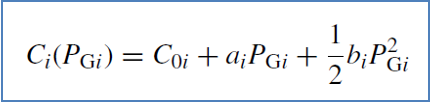

|| First Power Plant| Second Power Plant |Third Power Plant|
|:---|---:|---:|---:|
| C0i |  10  | 20 | 20 | 
| ai | 1 | 1.1 | 1.25 | 
| bi| 0.1 | 0.05 | 0.1 | 
  
The specific system demand levels for 3 cases were $P^{Total}_D$: 5 MW, 30 MW, and 80 MW. The maximum capacity of each unit is 30 MW for the first unit, 40 MW for the second unit, and 50 MW for the third unit.


### 3.a)
Solve this ED problem numerically in Python by using the ipopt. To answer this question, take into account the maximum capacity of each unit (i.e., 30 MW for the first unit, 40 MW for the second unit, and 50 MW for the third unit).

In [3]:
m = pyo.ConcreteModel(name = "Economic dispatch with quadratic cost functions")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG1 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG2 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG3 = pyo.Var(domain=pyo.NonNegativeReals)

##
# 2. Objective function
##

cost_0 = 10 +    1 * m.PG1 + 0.5 *  0.1 * m.PG1**2
cost_1 = 20 +  1.1 * m.PG2 + 0.5 * 0.05 * m.PG2**2
cost_2 = 20 + 1.25 * m.PG3 + 0.5 *  0.1 * m.PG3**2

m.cost = pyo.Objective(
    expr = cost_0 + cost_1 + cost_2,
    sense = pyo.minimize,
)

##
# 3. Constraints
##

# For the case of 80 MW demand (other cases: 5 MW, 30 MW)
m.demand = pyo.Constraint(expr = m.PG1 + m.PG2 + m.PG3 == 80)

m.pg1_max = pyo.Constraint(expr = m.PG1 <= 30)
m.pg2_max = pyo.Constraint(expr = m.PG2 <= 40)
m.pg3_max = pyo.Constraint(expr = m.PG3 <= 50)

# Solve the problem
solver = pyo.SolverFactory('ipopt')
solver.solve(m)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 4, 'Number of variables': 3, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.14.9\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.038845062255859375}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [4]:
summarise_results(m)

<div class="alert alert-block alert-info">

💡 As usual, you could use Python to automate - and make it easier to extend this to a larger problem with many more power plants. For example, you might specify the cost function as an actual Python function and and sum it up with `sum()` in the objective:

```python
PG = [m.PG1, m.PG2, m.PG3]
C = [10, 20, 20]
a = [1, 1.1, 1.25]
b = [0.1, 0.05, 0.1]

def cost(i):
    return C[i] + a[i] * PG[i] + 0.5 * b[i] * PG[i]**2

m.cost = pyo.Objective(
    expr = sum(cost[i] for i in range(3)),
    sense = pyo.minimize,
)
```

</div>

### 3.b)
Consider now the ED as above but with elastic demand characterized as follows:
# <center> 𝑈𝑗(𝑃𝐷𝑗) = (𝑎𝑗 + 𝑏𝑗𝑃𝐷𝑗)𝑃𝐷𝑗  
# <center> 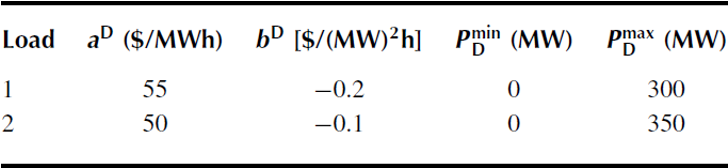
What are the optimal results? Answer this question after the problem is numerically solved in Python. What are the active constraints and their Lagrange multipliers?


<div class="alert alert-block alert-info">

💡 Superscript and subscript “D” in the table above indicates “demand.”
</div>

In [5]:
m = pyo.ConcreteModel(name = "Economic dispatch with quadratic cost functions and elastic demand")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

# Generation
m.PG1 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG2 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG3 = pyo.Var(domain=pyo.NonNegativeReals)

# Demand
m.PD1 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD2 = pyo.Var(domain=pyo.NonNegativeReals)

##
# 2. Objective function
##

PG = [m.PG1, m.PG2, m.PG3]
PD = [m.PD1, m.PD2]
C = [10, 20, 20]
a = [1, 1.1, 1.25]
b = [0.1, 0.05, 0.1]
ad = [55, 50]
bd = [-0.2, -0.1]

def cost(i):
    return C[i] + a[i] * PG[i] + 0.5 * b[i] * PG[i]**2

def util (j):
    return  ad[j]* PD[j]  +   bd[j] * PD[j]**2

m.SW = pyo.Objective(
    expr =  util (0) + util (1) - (cost(0) + cost(1) + cost(2)),
    sense = pyo.maximize,
)

##
# 3. Constraints
##

m.demand = pyo.Constraint(expr = m.PG1 + m.PG2 + m.PG3 == m.PD1 + m.PD2)

m.pg1_max = pyo.Constraint(expr = m.PG1 <= 30)
m.pg2_max = pyo.Constraint(expr = m.PG2 <= 40)
m.pg3_max = pyo.Constraint(expr = m.PG3 <= 50)
m.pd1_max = pyo.Constraint(expr = m.PD1 <= 300)
m.pd2_max = pyo.Constraint(expr = m.PD2 <= 350)


# Solve the problem
solver = pyo.SolverFactory('ipopt')
solver.solve(m)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 6, 'Number of variables': 5, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.14.9\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.023051977157592773}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [6]:
summarise_results(m)

### 3.c)
What is the social welfare for the optimal solution?

<div style="color:red">
4864,3333
</div>


### 3.d)
What can you say about the incremental utility? What does the incremental utility say?

<div style="color:red">
The incremental utility (or benefit function/ matginal utility) is equal to:

$$ IU_j(P_{Dj}) = \frac{d U_j(P_{Dj})}{dP_{Dj}} $$

It is equal to minus Lagrange multiplier, so **35,67**

It should be stressed that all generating units must operate at identical incremental costs
(marginal costs) only in the case that the capacity constraints are not active, which is here not
thecase. Both demands operate at identical marginal utilities